In [1]:
#pip install summarytools

In [2]:
import os
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt
os.listdir("../data/raw")

['winequalityN.csv']

In [3]:
os.getcwd()

'C:\\Users\\S P E C T R E\\Desktop\\Personal Projects\\wine_quality_project\\notebooks'

In [4]:
#loading the data
wine_pro = pd.read_csv("../data/raw/winequalityN.csv", sep=';')
wine_pro.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#EDA
dfSummary(wine_pro, is_collapsible=False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,fixed acidity[float64],Mean (sd) : 8.3 (1.7)min < med < max:4.6 < 7.9 < 15.9IQR (CV) : 2.1 (4.8),96 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAoFJREFUeJzt3U+L2kAYgPEZky2piiIWvXnZY6EHj36Ifth+hAp+Aq978iaEoJhNSIwpWdie+mczmei8w/O7z5qFh+Awvoyu61oBrhs8+gGAjwiVw7TWn5VSnwyXF3VdZ5YfCQ8SuhzpfD7/PplMZibrz+dzorX+Qax+cDbU5k3aRLrZbLLpdJq3WXg6naLdbjeL47h5GxOqB1wO9U0T6WKxeDVY2nxtgCfYTEEEQoUIhAoRCBUiECpEIFSIQKgQgVAhAqFCBEKFCIQKEQgVIhAqRCBUiECoEIFQIQKhQgTnf+FvqqqqJ6XURGtt+icYDnSIl6GmafpUluW31WoVBEHQat7qHcOBbvEy1KIowiiKhuv1Ol8ul0nb9QwHusfLUN+NRiPTwcAGw4EOYTMFEQgVIhAqRCBUiECoEIFQIQKhQgRChQiEChEIFSIQKkQgVIhAqBCBUCFC6PD1O5Pb7db8Sh/oL9Su1++UZRlVVfU1z/OfSinT35TCE6GL1+80DofDbL/fD6/Xa9DP40GS0NXrd5Ik4Rf2+I3NFETwembqgePWjFpbRqg9jFszam0foVoet2bUuh+E2s+4NRtBy9hMQQRChQiEChEIFSIQKkRg198DDgvsI1TLOCzoB6FaxmFBPwi1JxwW2MVmCiLwRnUMl2T8GaE6hEsy/o5QHcIlGR1C7TBJyhSpIS7JaBlql0lSpkhxzzeq8SQpU6S4+3dUk0lSpkgfo/L0+JbNlEdSj49vCdUjRcfj2+12u4jj+IvW+tzhAOlmuPafb/Pwo/9E20+9XC5va9I0jY7H4/Ce66V+tq3nVgayLOv0Nm6+cqRp+jwej18Gg0HZdv3/3ua/ALiTgEsaf/c5AAAAAElFTkSuQmCC"">",0(0.0%)
2,volatile acidity[float64],Mean (sd) : 0.5 (0.2)min < med < max:0.1 < 0.5 < 1.6IQR (CV) : 0.2 (2.9),143 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmtJREFUeJzt3U9u2kAYh+Fx7RQXkBFCgh0XiNQFSx+ih+0RWHACbsAOCSEQThyM7cqRkLpIK/wP/BveZz+AklfOMLbyOXmeG6Drvj36AwC38IylHMf5YYz5XuMlznmevzf4kVCDZ2ukk8nkVxAE46qvcTwe947j/CbWbrAy1OJKWkQahuH7aDSKyy4+HA7+arUa73a74opMqB1ga6ifikin0+lbxeXF1gEdwZcpSCBUSCBUSCBUSPAsPQsNsix7aeEj4UE8G89CkyTx0zR9jeN4aYyp+q0fzxJqzbtDwXA4nIZheCx7FrrZbMbr9bp/uVzciu+NZwm17t2h61Wx1+sty56F7vd7zkAt43X17hBXRdx1j1r17hBXRfyN4ylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRI6OywiUdL07SYqhI4jlNlOZOpG0aoX4ii6CVJkp/z+dx1Xbf0v3VnMnXzCPUL5/PZ832/v1gs4tlsti+zlsnU7SDU/xgMBlWnUzN/oGF8mYIEQoUEQoUEQoUEQoUEQoUEQoUd56g1RpkHWZYVtyGBdkOtM8r8OsY8juOlMabKoTlw8xW18ihzxpjj7rdQq4wyf+Yx5jx51Tzu9TeMJ6/aQagN48mrdhBqS3jyqlmEatf+1to9LqFatL+1eY9LqJbsb23f43q3/gDKvvDpdPpcE0WRv91u+/dcr/re17V1pGla/E7rbB0e5SPP83/+FfkDt50nCeVaj94AAAAASUVORK5CYII="">",0(0.0%)
3,citric acid[float64],Mean (sd) : 0.3 (0.2)min < med < max:0.0 < 0.3 < 1.0IQR (CV) : 0.3 (1.4),80 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAlxJREFUeJzt3L1y2kAYRuHdCBwZMvwMCXS0FJ5xQclF5GJzCSloabgDOmaEBgZZGCGUkWucIAmC3p3z1F6W4hh7pU/YLMsMUHdfHv0GgGs0/vUD1tpnY8yTKeeYZVlcci1wXah5pIPB4Gen0+mbEna7XWit/UWsuPcn6lMe6Ww2i7vd7qHIC2+3W38+n/eDIMg/jQkV9/3Tn8sjHQ6HbyVeP/+3AaiMwxQkECokECokECokECokECokECokECokECokECokECrcudf/KIwYovahMmIIiVAZMYRKqB8YMUSOwxQkECokECokECokECok1P7U/yjcbKgXQr2Amw31Q6iXcbOhZgj1L7jZUB8cpiCBUCGBUCGBUCGBUCHhrqf+NE2bxpiOtbbM8s75fG4q7g2hUKMoaiZJ8joejz3P8wpdi8wlSeKnafpyOBx+G2PeVPaGWKjH47Hh+35rOp0eRqNRWHT9arXqL5fL1ul08pT2hugF/3a7XeqieRiGz8p747Y4TEECoUICoUICoUICoUICoUICoUICoUICE/53UHHOgAcDLyDUG6s6Z8CDgZcR6o1VmTPgwcDPEeqdlJ0z4MHAyzhMQQKhQgKhQgKhQgKhQgKhQgKhQgKhQgIX/N2aE3B2VoBQHZoTcHlWgFBrpOr3EWwdnhUgVLfmBJydFeAwBQmECgmECgmECgkcphyTOvq8FqE6JHL4ea3Gtdfnir7wfr//WBNFkb9er1v/c73q3lXf92az+ZZfh51MJrbX670XWRvH8dfFYvEjCILv1tpd0b1v4D3Lsk9/uf4ARqpjgW3MtscAAAAASUVORK5CYII="">",0(0.0%)
4,residual sugar[float64],Mean (sd) : 2.5 (1.4)min < med < max:0.9 < 2.2 < 15.5IQR (CV) : 0.7 (1.8),91 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAhhJREFUeJzt3TFPwkAchvE7QFMFIQ

# Insights from summary

i. We see there are no missing values so no imputation needed

ii.There are 240 duplicates which is almost 15% of the data

iii.Target is imbalanced, majority of the data is 5 and 6

iv.There are outliers looking at the residual sugar and sulfur dioxide features


In [6]:
#Exploring the data 
numeric_features = [feature for feature in wine_pro.columns if wine_pro[feature].dtype != '0']
categorical_features = [feature for feature in wine_pro.columns if wine_pro[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

We have 0 categorical features : []


#looking at the correlation between the feature 
plt.figure(figsize = (12, 8))
sns.heatmap(wine_pro.corr(), annot = False,  cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

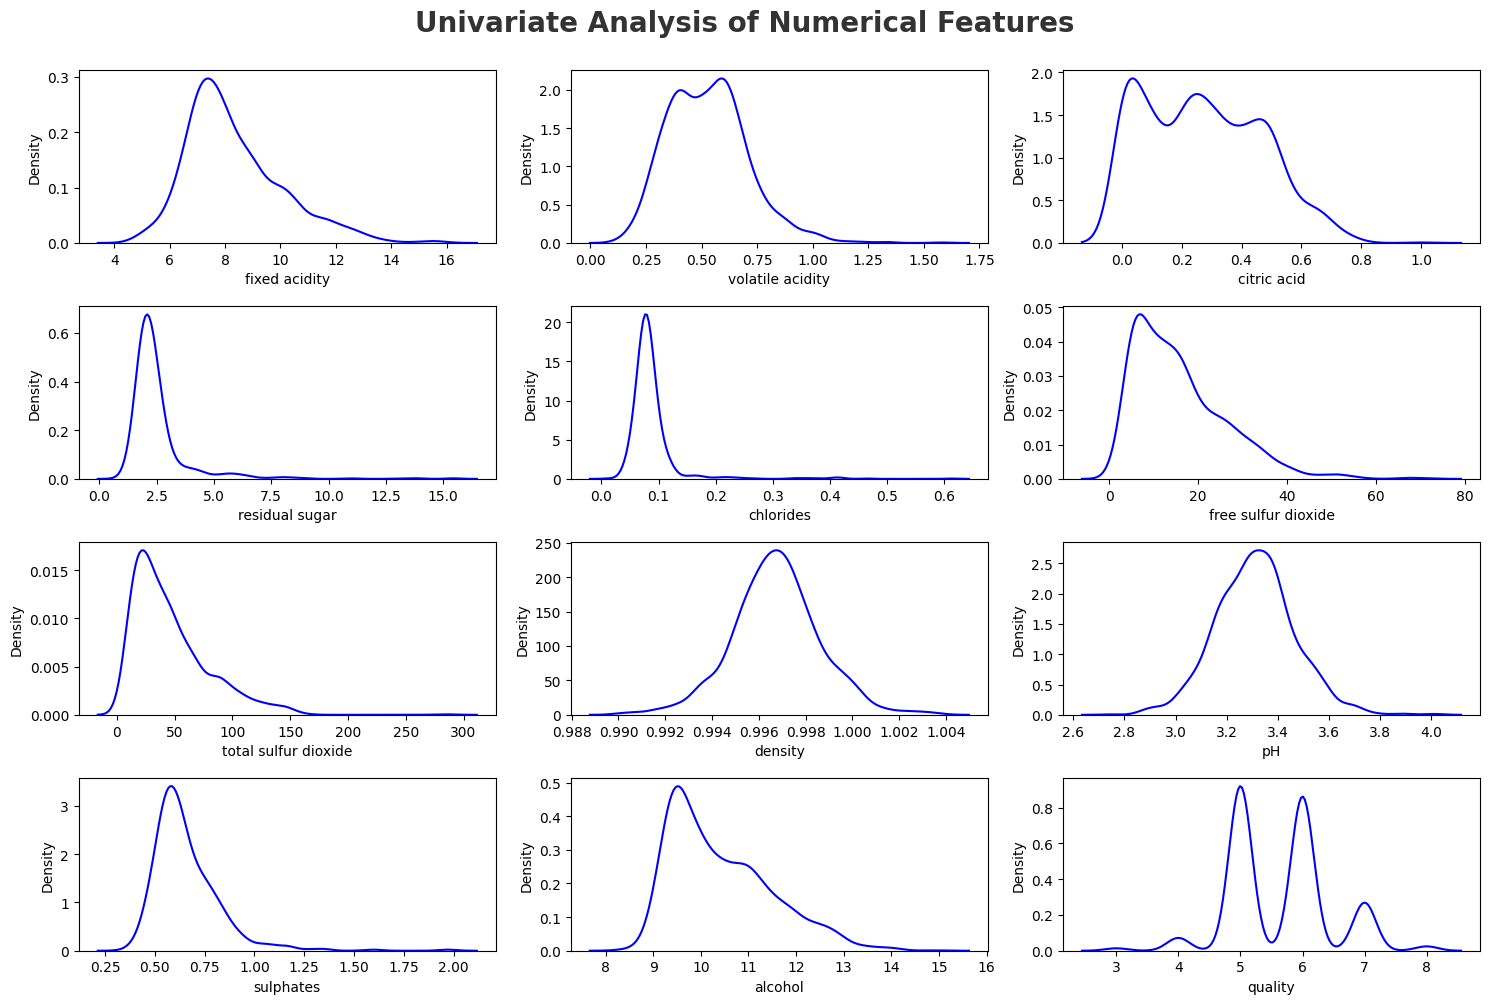

In [7]:
#Univariate Analysis
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=wine_pro[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Most of the chemical features in the wine dataset show right-skewed distributions, particularly residual sugar, chlorides, free sulfur dioxide, and total sulfur dioxide. This suggests that while most wines have low values for these attributes, there are a few wines with unusually high levels, which could be considered outliers.

Features like fixed acidity, volatile acidity, citric acid, and sulphates are roughly unimodal, though slightly skewed. The density and pH variables are tightly clustered, indicating low variance.

The alcohol distribution is right-skewed, meaning most wines have moderate alcohol levels, with only few high-alcohol wines.

The quality distribution is multimodal, showing that classes are not uniformly distributed — most wines are rated between 5 and 6, which aligns with the earlier class imbalance issue we identified.

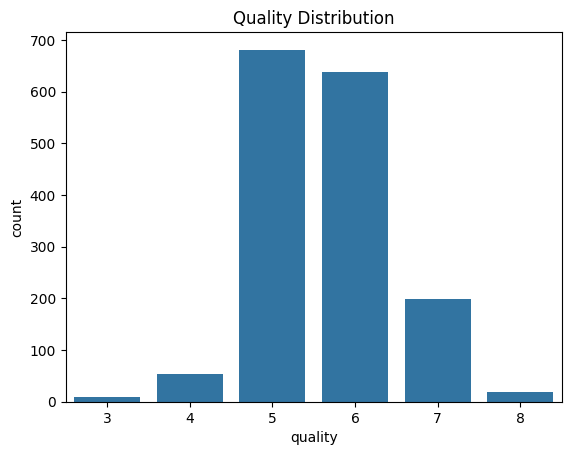

In [8]:
#vizualising the distribution of the data 
sns.countplot(x = "quality", data = wine_pro)
plt.title("Quality Distribution")
plt.show()

The quality label is unbalanced

In [ ]:
#Multi/Bi- Variate Analysis 
compare = sns.pairplot(wine_pro, hue = "quality", palette = "CMRmap")

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine_pro.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Feature Correlation Heatmap (Simple)')
plt.show()

#### insights from heatmap
i.There is  a strong positive correlation between alcohol and quality, meaning higher alcohol content is consistently linked with better-rated wines.

ii. There is  a strong negative correlation between Volatile Acidity and quality, meaning high volatile acidity (vinegar-like taste) significantly lowers perceived quality.

iii. There is  a Moderate Positive correlation between sulphates Acidity and quality.  Sulphates act as preservatives; moderate levels correlate with higher quality.

iv. There is  a Slight Positive correlation between Citric Acid Acidity and quality. Citric acid slighlty improves acidity balance, contributing mildly to quality

v. Residual Sugar, Free SO2, Total So2, has a weak or no correlation to quality of wine, meaning little influence on the final scores on quality

Features like residual sugar, chlorides, free sulfur dioxide, and total sulfur dioxide have colors that are nearly white/gray when correlated with quality. This indicates they have very little to no direct linear impact on the final quality score compared to alcohol and volatile acidity.


In [ ]:
wine_pro

In [ ]:
#Quality distribution
wine_pro["quality"].value_counts()

The quality label is unbalanced in the dataset

In [ ]:
#checking for outliers 
for col in columns:
    if col in wine_pro.columns:
        Q1 = wine_pro[col].quantile(0.25)
        Q3 = wine_pro[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
            
        outlier_mask = (wine_pro[col] < lower_bound) | (wine_pro[col] > upper_bound)
        outliers[col] = wine_pro[outlier_mask].index.tolist()
    
return outliers